In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [13]:
df = pd.read_csv("heart-disease.csv")

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [21]:
df["thal"].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [23]:
df["fbs"].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

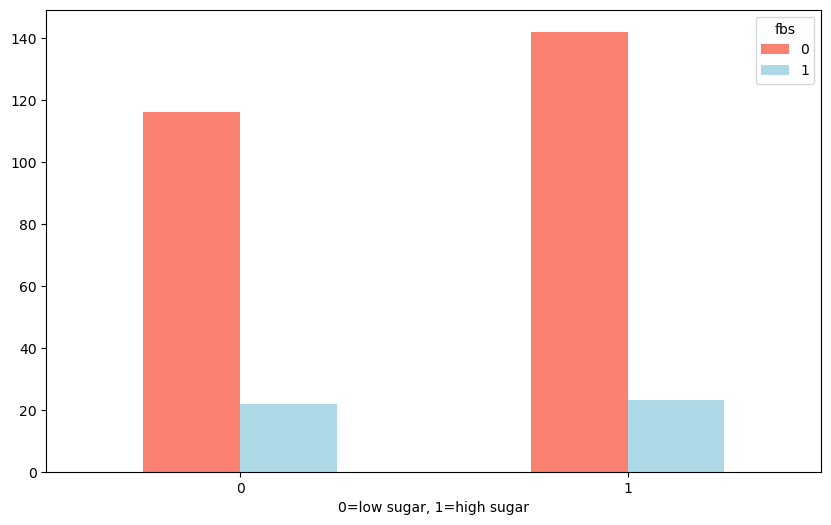

In [25]:
pd.crosstab(df.target,df.fbs).plot(kind = "bar", figsize = (10,6), color = ["salmon", "lightblue"])
plt.xlabel("0=low sugar, 1=high sugar")
plt.xticks(rotation = 0)
plt.show()

In [27]:
pd.crosstab(df.target,df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


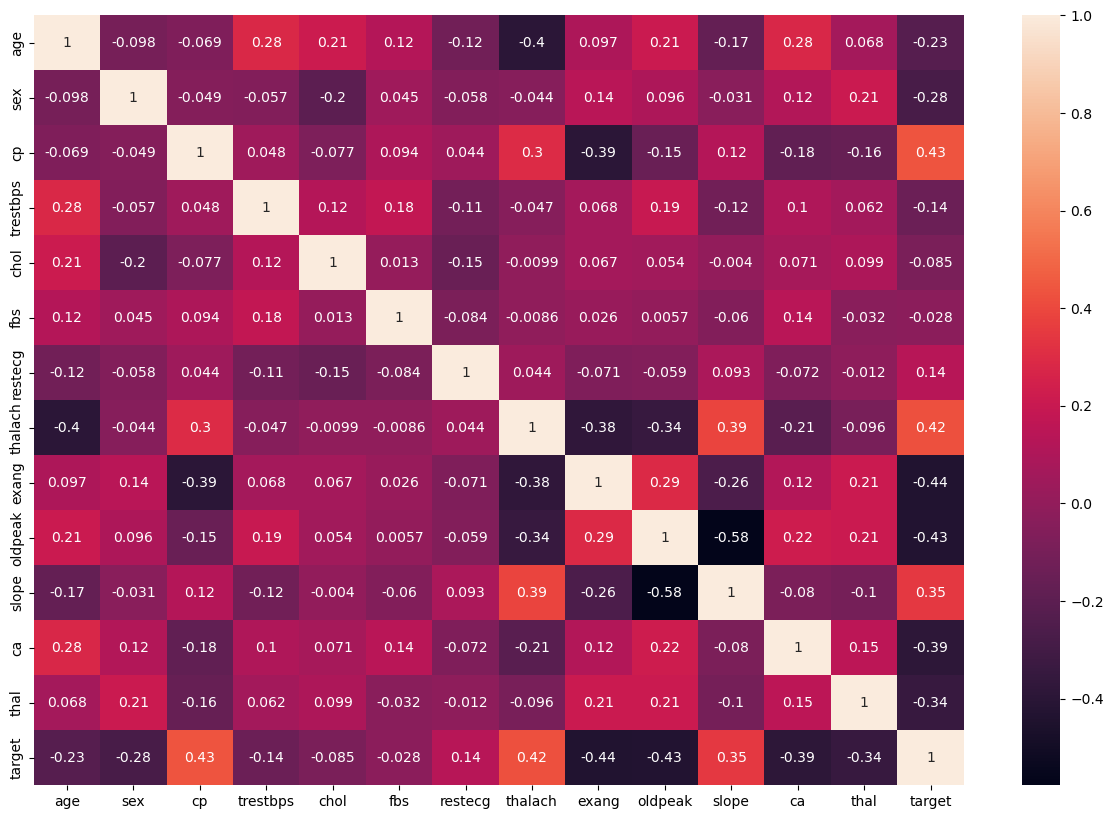

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()  
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()  


In [31]:
x = df.drop("target", axis = 1)
y = df["target"]

In [33]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
models = { "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
model_scores

C:\Users\smm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

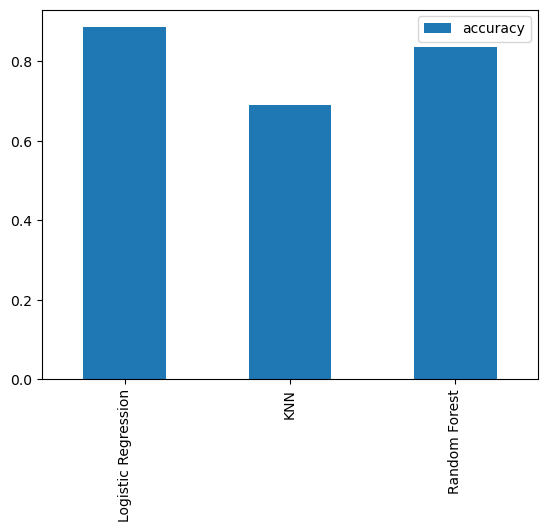

In [37]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()
plt.show()

In [39]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [45]:
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

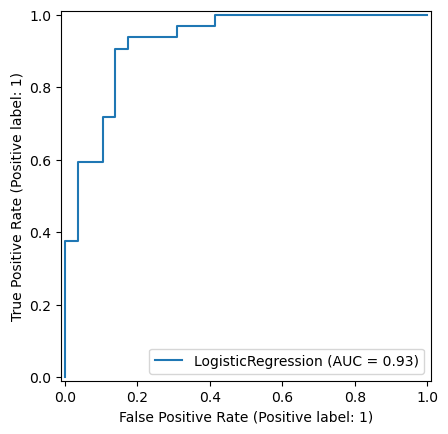

In [51]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg.best_estimator_, X_test, y_test)
plt.show()

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [54]:
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [55]:
cv_prc = cross_val_score(clf, x, y, cv = 5, scoring = "precision")
cv_prc = np.mean(cv_prc)
cv_prc

0.8207936507936507

In [56]:
cv_rec = cross_val_score(clf, x, y, cv = 5, scoring = "recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [57]:
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

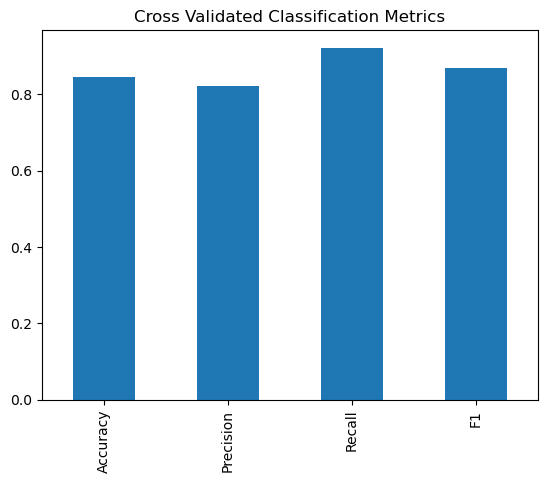

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc, 
    "Precision": cv_prc, 
    "Recall": cv_rec, 
    "F1": cv_f1
}, index = [0])

cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics", legend=False)

plt.show()

In [59]:
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")
clf.fit(X_train, y_train);
clf.coef_
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

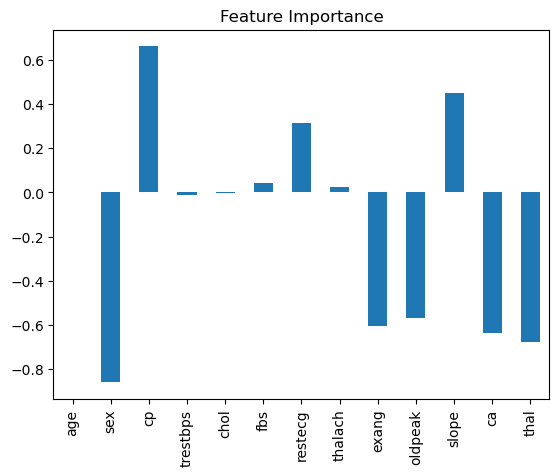

In [63]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);
plt.show()